<a href="https://colab.research.google.com/github/pseeej/MachineLearning_DCLAB/blob/master/DL%20for%20Everyone/04.%20Multi%20Linear%20Regression.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from mpl_toolkits import mplot3d

In [2]:
# 공부 시간 X와 성적 Y의 리스트 만들기
data = [[2, 0, 81], [4, 4, 93], [6, 2, 91], [8, 3, 97]]
x1 = [i[0] for i in data]
x2 = [i[1] for i in data]
y = [i[2] for i in data]

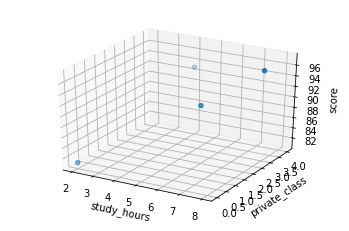

In [3]:
# 그래프로 확인
ax = plt.axes(projection='3d')
ax.set_xlabel('study_hours')
ax.set_ylabel('private_class')
ax.set_zlabel('score')

ax.dist = 11
ax.scatter(x1, x2, y)
plt.show()

In [4]:
# 리스트로 되어 있는 x와 y값을 numpy 배열로 바꾸기(index로 하나씩 불러와 계산할 수 있도록 하기 위함)
x1_data = np.array(x1)
x2_data = np.array(x2)
y_data = np.array(y)

In [5]:
# 기울기 a와 절편 b의 값 초기화
a1 = 0
a2 = 0
b = 0

In [6]:
# 학습률
lr = 0.02

In [7]:
# 몇 번 반복할지 설정(0부터 세므로 원하는 반복 횟수에 +1)
epochs = 2001

In [8]:
# 경사 하강법 시작
for i in range(epochs):
  y_pred = a1 * x1_data + a2 * x2_data + b
  error = y_data - y_pred
  # 오차 함수를 a1로 미분한 값
  a1_diff = -(2/len(x1_data)) * sum(x1_data * (error))
  # 오차 함수를 a2로 미분한 값
  a2_diff = -(2/len(x2_data)) * sum(x2_data * (error))
  # 오차 함수를 b로 미분한 값
  b_diff = -(2/len(x1_data)) * sum(y_data - y_pred)

  # 학습률 곱해 기존의 값 update
  a1 = a1 - lr * a1_diff
  a2 = a2 - lr * a2_diff
  b = b - lr * b_diff

  if i % 100 == 0:
    print("epoch=%.f, 기울기1=%.04f, 기울기2=%.04f, 절편=%.04f" %(i, a1, a2, b))

epoch=0, 기울기1=18.5600, 기울기2=8.4500, 절편=3.6200
epoch=100, 기울기1=7.2994, 기울기2=4.2867, 절편=38.0427
epoch=200, 기울기1=4.5683, 기울기2=3.3451, 절편=56.7901
epoch=300, 기울기1=3.1235, 기울기2=2.8463, 절편=66.7100
epoch=400, 기울기1=2.3591, 기울기2=2.5823, 절편=71.9589
epoch=500, 기울기1=1.9546, 기울기2=2.4427, 절편=74.7362
epoch=600, 기울기1=1.7405, 기울기2=2.3688, 절편=76.2058
epoch=700, 기울기1=1.6273, 기울기2=2.3297, 절편=76.9833
epoch=800, 기울기1=1.5673, 기울기2=2.3090, 절편=77.3948
epoch=900, 기울기1=1.5356, 기울기2=2.2980, 절편=77.6125
epoch=1000, 기울기1=1.5189, 기울기2=2.2922, 절편=77.7277
epoch=1100, 기울기1=1.5100, 기울기2=2.2892, 절편=77.7886
epoch=1200, 기울기1=1.5053, 기울기2=2.2875, 절편=77.8209
epoch=1300, 기울기1=1.5028, 기울기2=2.2867, 절편=77.8380
epoch=1400, 기울기1=1.5015, 기울기2=2.2862, 절편=77.8470
epoch=1500, 기울기1=1.5008, 기울기2=2.2860, 절편=77.8518
epoch=1600, 기울기1=1.5004, 기울기2=2.2859, 절편=77.8543
epoch=1700, 기울기1=1.5002, 기울기2=2.2858, 절편=77.8556
epoch=1800, 기울기1=1.5001, 기울기2=2.2858, 절편=77.8563
epoch=1900, 기울기1=1.5001, 기울기2=2.2857, 절편=77.8567
epoch=2000, 기울기1=1.5000, 기울기2=2.

/usr/local/lib/python3.7/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


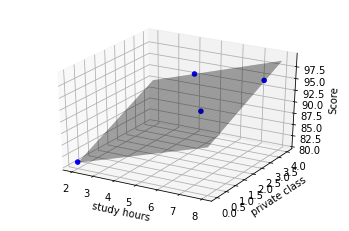

In [9]:
#참고 자료, 다중 선형회귀 '예측 평면' 3D로 보기

import statsmodels.api as statm
import statsmodels.formula.api as statfa
#from matplotlib.pyplot import figure

X = [i[0:2] for i in data]
y = [i[2] for i in data]

X_1=statm.add_constant(X)
results=statm.OLS(y,X_1).fit()

hour_class=pd.DataFrame(X,columns=['study_hours','private_class'])
hour_class['Score']=pd.Series(y)

model = statfa.ols(formula='Score ~ study_hours + private_class', data=hour_class)

results_formula = model.fit()

a, b = np.meshgrid(np.linspace(hour_class.study_hours.min(),hour_class.study_hours.max(),100),
                   np.linspace(hour_class.private_class.min(),hour_class.private_class.max(),100))

X_ax = pd.DataFrame({'study_hours': a.ravel(), 'private_class': b.ravel()})
fittedY=results_formula.predict(exog=X_ax)

fig = plt.figure()
graph = fig.add_subplot(111, projection='3d')

graph.scatter(hour_class['study_hours'],hour_class['private_class'],hour_class['Score'],
              c='blue',marker='o', alpha=1)
graph.plot_surface(a,b,fittedY.values.reshape(a.shape),
                   rstride=1, cstride=1, color='none', alpha=0.4)
graph.set_xlabel('study hours')
graph.set_ylabel('private class')
graph.set_zlabel('Score')
graph.dist = 11

plt.show()